In [30]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
import pandas as pd
import numpy as np
# Supposons que vous avez vos données dans X (caractéristiques) et y (cible)
# X contient les caractéristiques de vos parcs éoliens (par exemple, vitesse du vent, superficie, etc.)
# y contient les valeurs cibles que vous souhaitez prédire (par exemple, la consommation d'énergie)


In [44]:
data = pd.read_csv("/workspace/Energy_Data_prepared2.csv")




In [45]:
data.head()

,dtm,MIP,Solar_MW,Solar_capacity_mwp,Solar_installedcapacity_mwp,Wind_MW,SS_Price,DA_Price
0,2020-09-20T00:00:00.000000+0000,20.06,0.0,2130.537493,2228.208777,996.284,2.50,32.17
1,2020-09-20T00:30:00.000000+0000,19.77,0.0,2130.537493,2228.208777,957.576,15.00,32.17
2,2020-09-20T01:00:00.000000+0000,28.68,0.0,2130.537493,2228.208777,941.044,47.95,32.00
3,2020-09-20T01:30:00.000000+0000,28.97,0.0,2130.537493,2228.208777,964.366,29.13,32.00
4,2020-09-20T02:00:00.000000+0000,28.19,0.0,2130.537493,2228.208777,918.432,28.95,31.99


In [46]:
data['dtm'] = pd.to_datetime(data['dtm']).dt.strftime('%d %B %Y')


In [47]:
data.describe()

,MIP,Solar_MW,Solar_capacity_mwp,Solar_installedcapacity_mwp,Wind_MW,SS_Price,DA_Price
count,58368.000000,58293.000000,58368.000000,58368.000000,58265.000000,58368.000000,58368.000000
mean,85.011819,229.457787,2213.596987,2341.437871,574.893562,69.072138,64.168712
std,32.806404,379.612198,128.528670,145.720673,438.389387,29.169336,11.231040
min,-30.260000,0.000000,1863.496832,1955.199129,0.000000,-32.270000,13.410000
25%,67.627500,0.000000,2140.826405,2253.403130,139.546000,60.997500,64.960000
50%,83.530000,0.020532,2167.493256,2295.210540,514.076000,68.300000,64.960000
75%,100.610000,328.293937,2294.087775,2437.900986,1063.746000,80.000000,64.960000
max,163.400000,1811.852940,2454.720780,2609.227457,1192.744000,131.400000,89.760000


In [48]:
data.dropna(inplace=True)


In [57]:

X = data[["Solar_capacity_mwp", "Solar_installedcapacity_mwp"]]
y = data[["Solar_MW", "Wind_MW"]]  # Utilisez une liste de colonnes pour extraire plusieurs colonnes


In [58]:
# Divisez vos données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [59]:
# Créez et entraînez le modèle
model = DecisionTreeRegressor(random_state=42)
model.fit(X_train, y_train)

DecisionTreeRegressor(random_state=42)

In [60]:
# Faites des prédictions sur l'ensemble de test
predictions = model.predict(X_test)


In [61]:

# Évaluez les performances du modèle
mse = mean_squared_error(y_test, predictions)
print("Mean Squared Error:", mse)

Mean Squared Error: 86365.96114999516


In [62]:

# Calculate RMSE
rmse = np.sqrt(mean_squared_error(y_test, predictions))
print("Root Mean Squared Error:", rmse)


Root Mean Squared Error: 293.88086217036175


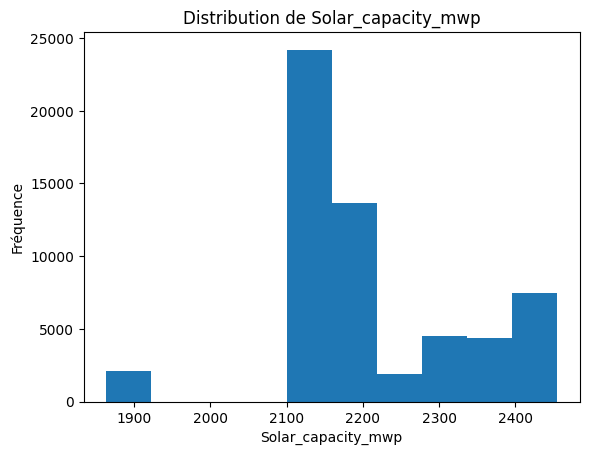

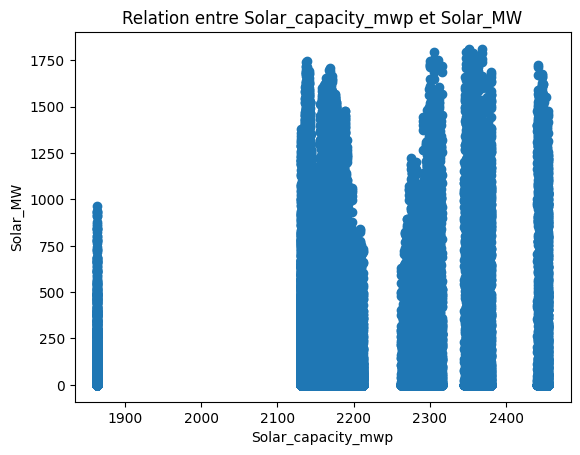

In [65]:
import matplotlib.pyplot as plt

# Exemple de tracé d'un histogramme
plt.hist(data['Solar_capacity_mwp'], bins=10)
plt.xlabel('Solar_capacity_mwp')
plt.ylabel('Fréquence')
plt.title('Distribution de Solar_capacity_mwp')
plt.show()

# Exemple de tracé d'un nuage de points
plt.scatter(data['Solar_capacity_mwp'], data['Solar_MW'])
plt.xlabel('Solar_capacity_mwp')
plt.ylabel('Solar_MW')
plt.title('Relation entre Solar_capacity_mwp et Solar_MW')
plt.show()




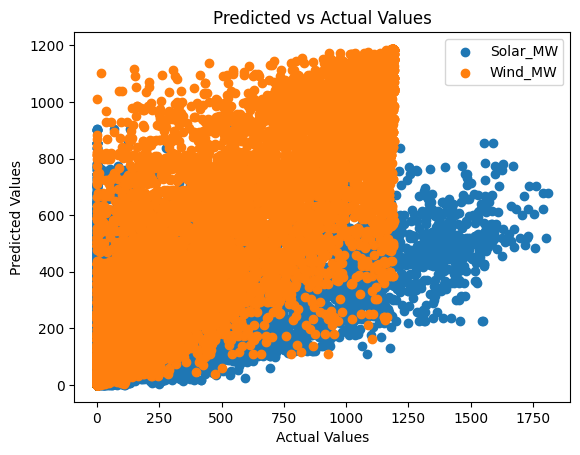

In [69]:
import matplotlib.pyplot as plt

# Create a scatter plot of predicted values vs actual values
plt.scatter(y_test['Solar_MW'], predictions[:, 0], label='Solar_MW')
plt.scatter(y_test['Wind_MW'], predictions[:, 1], label='Wind_MW')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Predicted vs Actual Values')
plt.legend()
plt.show()
